Importing Pandas and Matplotlib libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib widget

In [3]:
# File paths for each optimization level
file_paths = {
    "O0": "../solutions/vector_add_O0_results.txt",
    "O1": "../solutions/vector_add_O1_results.txt",
    "O2": "../solutions/vector_add_O2_results.txt",
    "O3": "../solutions/vector_add_O3_results.txt"
}

In [4]:
# Dictionary to store data for plotting
data = {}

In [5]:
# Load data from each file
for opt_level, file_path in file_paths.items():
    # Read data from the file (skip the header line)
    data[opt_level] = np.loadtxt(file_path, skiprows=1)
    # Each data[opt_level] will have columns: Serial No., Size, Float Time, Double Time

In [6]:
# Extract sizes (assuming sizes are the same across files)
sizes = data["O0"][:, 1]  # Second column in each file
[print(int(size)) for size in sizes]

1000000
2000000
4000000
8000000
16000000
32000000
64000000
128000000
256000000
512000000
1024000000


[None, None, None, None, None, None, None, None, None, None, None]

In [7]:
# Extract times for each optimization level
float_times = {opt: data[opt][:, 2] for opt in file_paths}  # Third column (float times)
double_times = {opt: data[opt][:, 3] for opt in file_paths}  # Fourth column (double times)


In [8]:
# Iterate through the dictionary and print each float value
for opt_level, times in float_times.items():
    print(f"{opt_level}:")
    for value in times:
        print(f"{value:.6f}") 
    print() 

O0:
0.005056
0.010265
0.020421
0.041208
0.082581
0.164341
0.328551
0.658576
1.315839
2.632046
5.256386

O1:
0.000749
0.001482
0.002759
0.005363
0.010955
0.020851
0.041510
0.083328
0.166975
0.351381
0.681271

O2:
0.000664
0.001244
0.002223
0.004221
0.008191
0.016134
0.031945
0.063720
0.128818
0.261224
0.531793

O3:
0.000668
0.001266
0.002204
0.004209
0.008230
0.016223
0.032083
0.063923
0.129352
0.261679
0.530393



In [9]:
# Iterate through the dictionary and print each double values
for opt_level, times in double_times.items():
    print(f"{opt_level}:")
    for value in times:
        print(f"{value:.6f}") 
    print() 

O0:
0.005040
0.010154
0.020326
0.041163
0.082867
0.164414
0.330169
0.659611
1.318712
2.637262
5.272334

O1:
0.001127
0.002054
0.004116
0.008106
0.015979
0.031934
0.063782
0.133569
0.270525
0.545849
1.005147

O2:
0.001134
0.002088
0.004154
0.008338
0.016415
0.032779
0.065307
0.137032
0.278091
0.560342
1.033031

O3:
0.001098
0.002025
0.004011
0.007929
0.015749
0.031611
0.063076
0.131036
0.264752
0.531976
0.997978



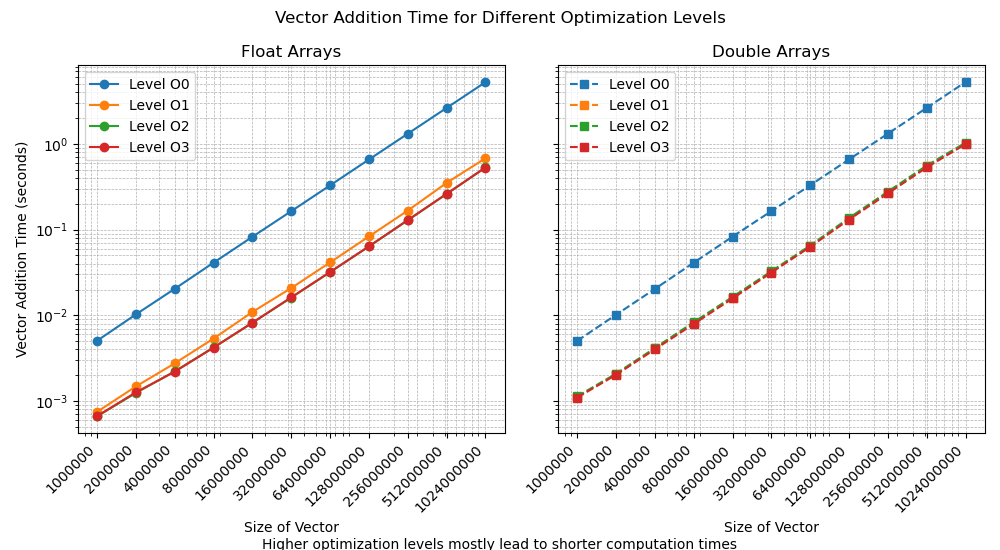

In [10]:
# Plotting
fig, (ax_float, ax_double) = plt.subplots(1, 2, figsize=(10, 5.5), sharey=True)
fig.suptitle("Vector Addition Time for Different Optimization Levels")

# Plot for float arrays
ax_float.plot(sizes, float_times['O0'], 'o-', label="Level O0")
ax_float.plot(sizes, float_times['O1'], 'o-', label="Level O1")
ax_float.plot(sizes, float_times['O2'], 'o-', label="Level O2")
ax_float.plot(sizes, float_times['O3'], 'o-', label="Level O3")
ax_float.set_xscale("log")
ax_float.set_yscale("log")
ax_float.set_title("Float Arrays")
ax_float.set_xlabel("Size of Vector")
ax_float.set_ylabel("Vector Addition Time (seconds)")
ax_float.legend()
ax_float.grid(True, which="both", linestyle="--", linewidth=0.5)

# Plot for double arrays
ax_double.plot(sizes, double_times['O0'], 's--', label="Level O0")
ax_double.plot(sizes, double_times['O1'], 's--', label="Level O1")
ax_double.plot(sizes, double_times['O2'], 's--', label="Level O2")
ax_double.plot(sizes, double_times['O3'], 's--', label="Level O3")
ax_double.set_xscale("log")
ax_double.set_yscale("log")
ax_double.set_title("Double Arrays")
ax_double.set_xlabel("Size of Vector")
ax_double.legend()
ax_double.grid(True, which="both", linestyle="--", linewidth=0.5)

# Add caption
plt.figtext(0.5, 0.01, "Higher optimization levels mostly lead to shorter computation times", ha="center", va="center", fontsize=10)

# Set x-ticks and rotate for better readability
ax_float.set_xticks(sizes)
ax_double.set_xticks(sizes)
ax_float.set_xticklabels([f"{int(s)}" for s in sizes], rotation=45, ha='right')
ax_double.set_xticklabels([f"{int(s)}" for s in sizes], rotation=45, ha='right')

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig("vector_addition.png")

# Display the plot
plt.show()